# **10장 순환신경망에서 어텐션으로**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **LAB 10-1 장기 기억이 필요한 시퀀스를 예측해 보자**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 300, 200
n_units = 128

# 비어있는 넘파이 배열을 생성한다.
# 이번에 생성할 데이터는 시퀀스에 인덱스가 있다
seq_X = np.empty(shape=(size, seq_len, 1))


In [ ]:
np.random.seed(42)

# Generate sequences where each value is the previous value plus a random change
for i in range(size):
    # Random starting value between 0 and 10
    seq_X[i, 0, 0] = np.random.uniform(low=0, high=10)
    for j in range(1, seq_len):
        # Add a random value between -1 and 1 to the previous element
        seq_X[i, j, 0] = seq_X[i, j-1, 0] \
                         + np.random.uniform(low=-3, high=3)

# You can print the first few sequences to verify
for i in range(5):
    print(f"Sequence[{i}]: {seq_X[i].flatten()}")

Sequence[0]: [  3.74540119   6.44968703   7.84165068   8.43360158   6.36971343
   4.30568055   1.65418222   3.8512391    4.45792917   5.70636463
   2.8298716    5.64933071   7.64398656   5.91802122   4.00897102
   2.10939808   0.93485154   1.08339013   0.67506024  -0.57756492
   0.09355245  -2.06948438  -3.31661649  -4.11844543  -4.38202553
  -2.67096976  -4.47292707  -4.38752044  -3.83303302  -6.55433055
  -5.90906144  -7.88591669 -10.49560714  -7.80229391  -5.00850171
  -3.15811762  -4.33043501  -6.74440233  -5.63900417  -5.9980892
  -8.2658598   -8.29479833 -11.08846721  -8.6325448  -10.07986491
  -9.1047312  -10.23446474 -10.11405662  -9.83379494 -11.72466821
  -8.90716044  -7.2563635   -4.61936985  -2.25040575  -1.66300588
   0.86823953  -1.60080545  -3.42490828  -6.15354454  -7.20156256
  -7.86949882  -9.24140463  -7.26897958  -8.12845962  -9.44285256
  -9.18667606 -11.34113071  -9.52794883 -12.08064496  -9.15932334
  -7.52585473  -9.33356064 -12.30042794 -10.40765936  -9.1665153

In [ ]:
n = seq_len
weights = 2 * (n - np.arange(seq_len)) / (n * (n + 1))
y = np.sum(seq_X.squeeze() * weights, axis=1)


# Print the first few Y values to verify
for i in range(5):
    print(f"y[{i}]: {y[i]}")

y[0]: -7.551939586806892
y[1]: 8.427819813360472
y[2]: 11.928846431419197
y[3]: -23.007677294640324
y[4]: -4.5443395286357875


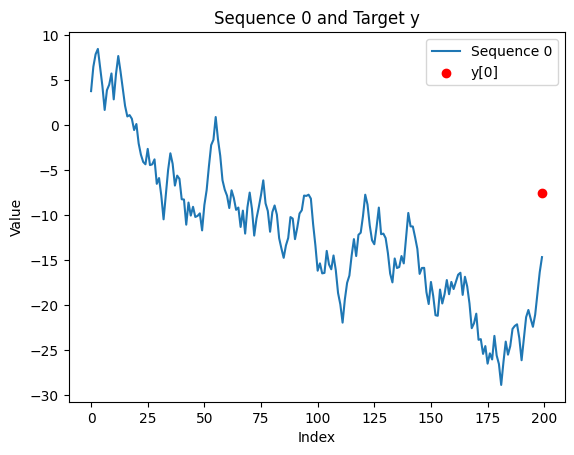

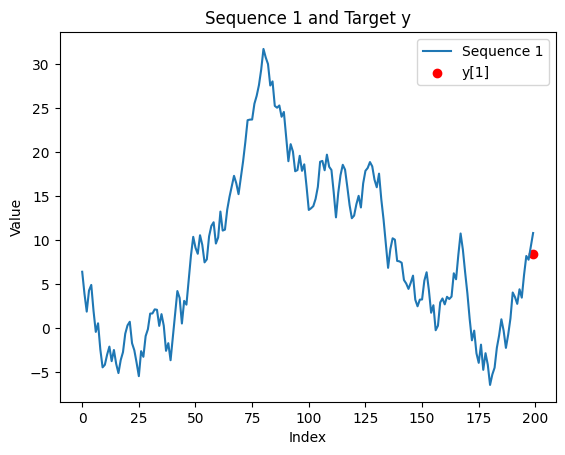

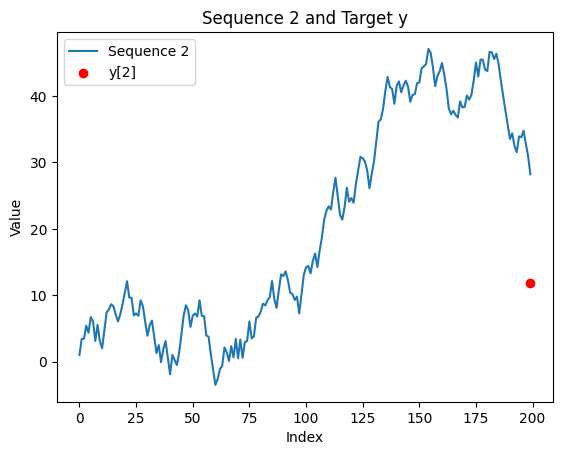

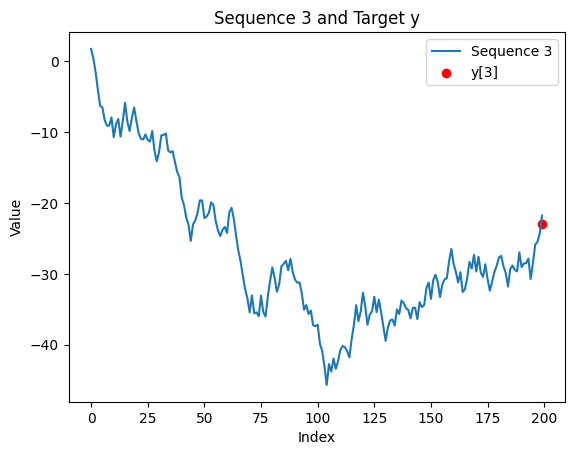

In [ ]:
# 첫 네 개의 시퀀스를 가시화하고 각 시퀀스의 레이블 y를 붉은 색으로 보임
num_plots = 4
for i in range(min(num_plots, size)):
    plt.plot(range(seq_len), seq_X[i], label=f'Sequence {i}')
    plt.scatter(seq_len -1, y[i], color='r', label=f'y[{i}]') # Plot Y at the end of the sequence
    plt.title(f"Sequence {i} and Target y")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

In [ ]:
train_size = int(size * 0.8)
train_X = seq_X[:train_size]
train_y = y[:train_size].reshape(-1,1)
test_X = seq_X[train_size:]
test_y = y[train_size:].reshape(-1,1)

In [ ]:
seq_X.shape, train_X.shape, train_y.shape

((300, 200, 1), (240, 200, 1), (240, 1))

In [ ]:
import tensorflow as tf
# units는 SimpleRNN 레이어에 있는 뉴런의 수
# return_sequences는 출력으로 시퀀스 전체를 출력할지 묻는 옵션
# input_shape = (seq_len, 1)에서
# seq_len는 하나의 입력이 가지는 시퀀스 크기,
# 1은 입력차원
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=n_units, input_shape=(seq_len, 1), return_sequences=False),
    tf.keras.layers.Dense(1)  # 출력: 다음 값 예측
])

model.compile(optimizer ='adam', loss = 'mse')
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_13 (SimpleRNN)       │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_X, train_y, epochs=25)


Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 124.2395
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 91.6075
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 85.5891
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 89.9058
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.0648
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.7789
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.1531
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.5835
Epoch 9/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 64.1397
Epoch 10/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 64.8034
Epoch 11/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.3786
Epoch 12/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 60.3709
Epoch 13/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 60.0600
Epoch 14/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 58.6599
Epoch 15/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 57.0850
Epoch 16/25
8/8 ━

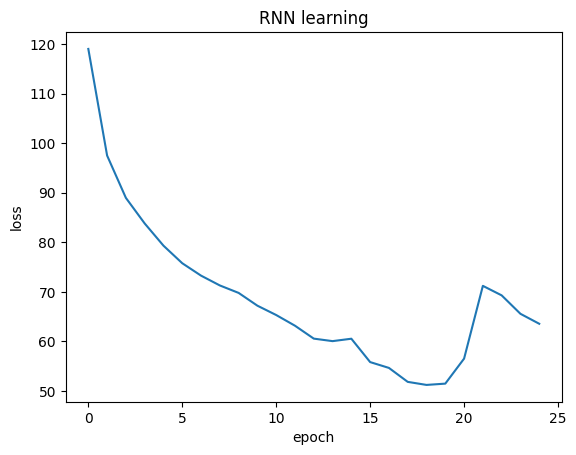

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 346ms/step


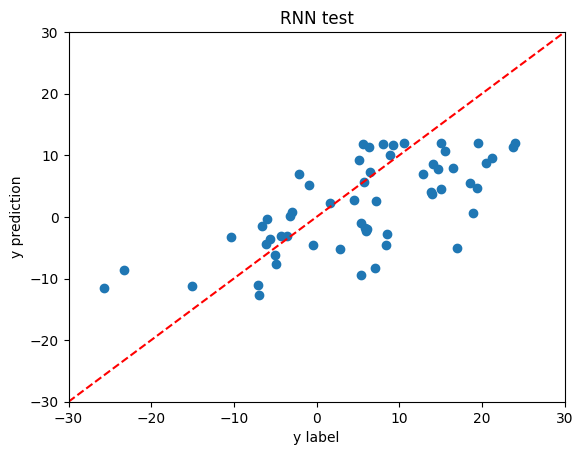

In [ ]:
plt.plot(history.history['loss'])
plt.title(f"RNN learning")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
y_hat = model.predict(test_X)
plt.scatter(test_y, y_hat)
plt.title(f"RNN test")
plt.xlabel("y label")
plt.ylabel("y prediction")
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.plot([-30,30],[-30,30],'r--')
plt.show()

In [ ]:
LSTM_model = tf.keras.Sequential([
   tf.keras.layers.LSTM(units = n_units, return_sequences=False,
                        input_shape=[seq_len, 1]),
   tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 132.1558
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 113.6308
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 84.7864
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 85.4771
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 88.2701
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 77.5580
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 68.5826
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 62.6446
Epoch 9/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 62.5130
Epoch 10/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 54.1874
Epoch 11/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 52.2418
Epoch 12/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 40.7345
Epoch 13/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 35.6612
Epoch 14/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 36.4955
Epoch 15/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.6523
Epoch 16/25
8/8 ━

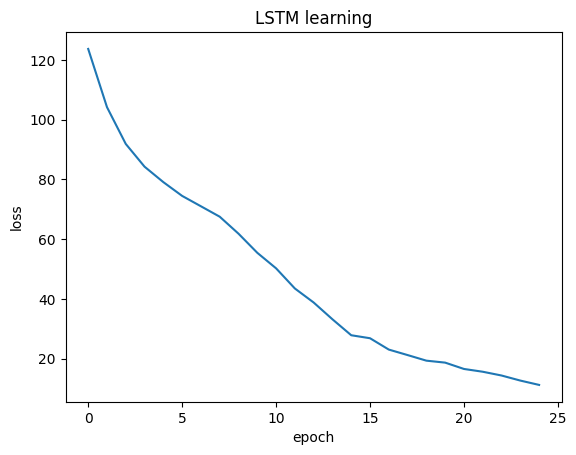

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


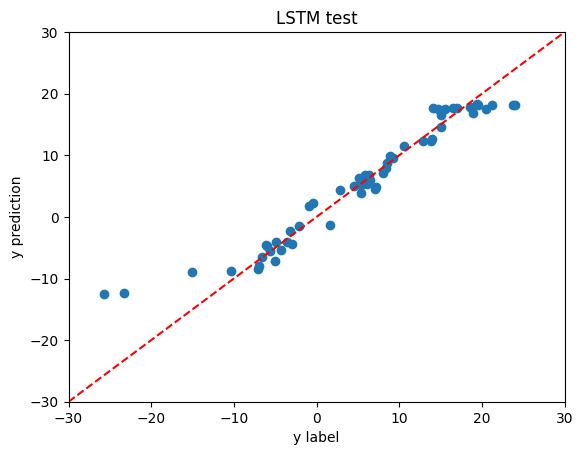

In [ ]:
history = LSTM_model.fit(train_X, train_y, epochs=25)
plt.plot(history.history['loss'])
plt.title(f"LSTM learning")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, y_hat)
plt.title(f"LSTM test")
plt.xlabel("y label")
plt.ylabel("y prediction")
plt.xlim(-30, 30); plt.ylim(-30, 30); plt.plot([-30,30],[-30,30],'r--')
plt.show()

In [ ]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = n_units, return_sequences=False,
                        input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

GRU_model.compile(optimizer ='adam', loss = 'mse')
GRU_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,433 (197.00 KB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = GRU_model.fit(train_X, train_y, epochs=25)


Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 124.1146
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 101.4677
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 72.5413
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 78.2273
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 64.5414
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 64.3757
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 70.7428
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 63.8006
Epoch 9/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 68.6068
Epoch 10/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 58.3828
Epoch 11/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 59.8380
Epoch 12/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 59.8944
Epoch 13/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 53.1608
Epoch 14/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 45.9463
Epoch 15/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 45.8605
Epoch 16/25
8/8 ━

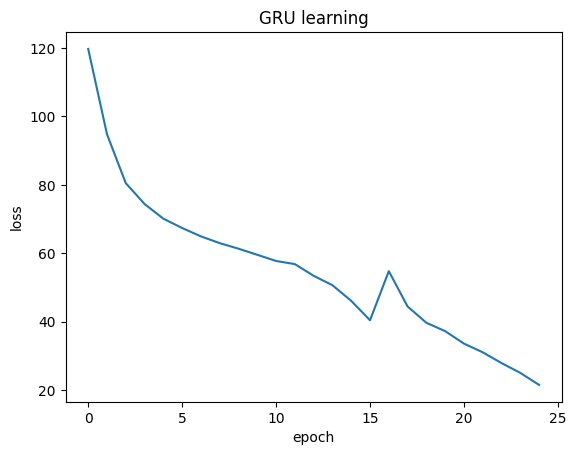

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


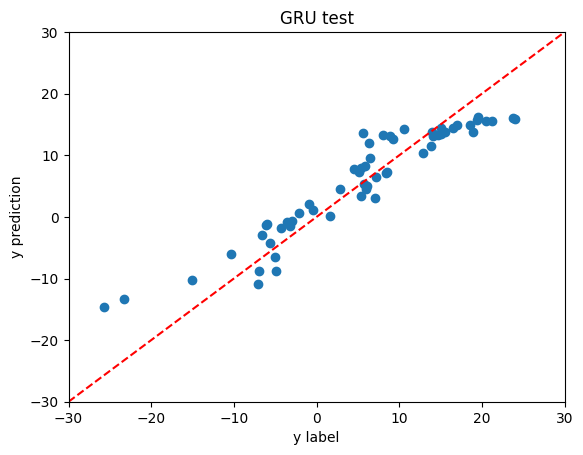

In [ ]:
plt.plot(history.history['loss'])
plt.title(f"GRU learning")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
y_hat = GRU_model.predict(test_X)
plt.scatter(test_y, y_hat)
plt.title(f"GRU test")
plt.xlabel("y label")
plt.ylabel("y prediction")
plt.xlim(-30, 30); plt.ylim(-30, 30); plt.plot([-30,30],[-30,30],'r--')
plt.show()